
## **Load in RGB Image**

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import base64
from io import BytesIO
from scipy.signal import convolve2d
from skimage import data, color, io
import IPython

# Import imageio library with alias 'io' (used later in the code)
import imageio as io
from scipy.signal import convolve2d

# Import PyTorch and the torchvision module
import torch
from torchvision import datasets
from skimage.util import montage

# Install and import the 'wandb' library for experiment tracking
!pip install wandb
import wandb as wb

# Import the 'imread' function from the skimage.io library
from skimage.io import imread

# Import the 'rescale' and 'resize' functions from skimage.transform
from skimage.transform import rescale, resize

In [2]:
# Define a function 'plot' for displaying images
def plot(x):
    # Create a figure and axis for displaying the image
    fig, ax = plt.subplots()

    # Display the image 'x' using a grayscale colormap
    im = ax.imshow(x, cmap='gray')

    # Turn off axis labels
    ax.axis('off')

    # Set the size of the figure
    fig.set_size_inches(5, 5)

    # Show the plot
    plt.show()

<ipython-input-3-c483ffe30c40>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = io.imread("https://www.rover.com/blog/wp-content/uploads/2018/09/ghost-dog.jpg")


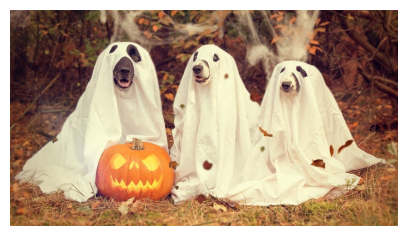

In [3]:
# Load an image from a URL and store it in the 'image' variable
image = io.imread("https://www.rover.com/blog/wp-content/uploads/2018/09/ghost-dog.jpg")

# Select all color channels of the image (no change)
image = image[:, :, :]

# Display the original image
plot(image)

In [4]:
# Print the shape of the original image (height, width, color channels)
image.shape

(536, 960, 3)

## **Resizing the Image**

In [5]:
# Crop and extract a region of interest from the original image
resized_image = image[46:270, 176:400, :]

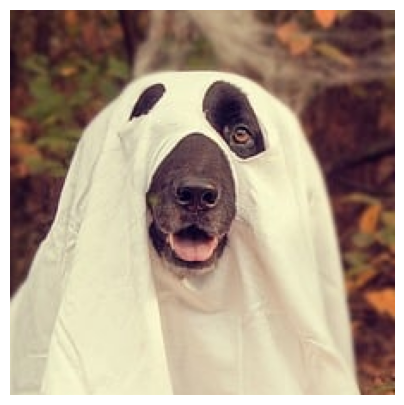

In [6]:
# Display the resized image
plot(resized_image)

In [7]:
# Print the shape of the resized image (height, width, color channels)
resized_image.shape

(224, 224, 3)

## **Grayscale Copy**

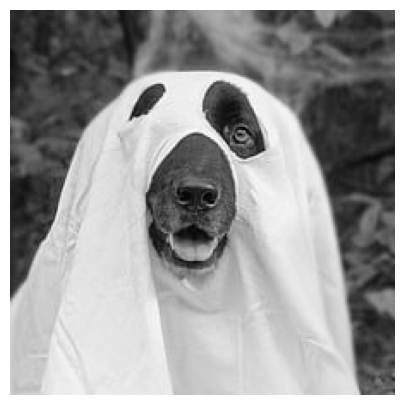

In [8]:
# Convert the resized image to grayscale by taking the mean of color channels
image_gray = np.mean(resized_image, axis=2)

# Display the grayscale image
plot(image_gray)


In [9]:
# Print the shape of the grayscale image (height, width)
image_gray.shape

(224, 224)

## **Convolving with 10 Filters**

In [10]:
# A function for convolving a filter `f` over an image `x`.
# The image `x` should be a 2D numpy array and `f` should be a 3x3 numpy array representing the filter.
def convolve(x,f):
# Creating a zero matrix `x2` of the same shape as `x` to store the convolved values.
  x2 = np.zeros(x.shape)

# Iterating through each pixel in the `x` matrix, except for the borders.
# This is to avoid out-of-bounds errors as the filter is 3x3.
  for i in range(1,x.shape[0]-1):
      for j in range(1,x.shape[1]-1):
# Applying the convolution: each element of the filter `f` is multiplied with the corresponding
# element in the neighborhood of the current pixel in `x`, and the results are summed up to get the
# new pixel value in `x2`.
          x2[i,j] = f[0,0] * x[i-1,j-1]  \
          +         f[0,1] * x[i-1,j]    \
          +         f[0,2] * x[i-1,j+1]  \
          +         f[1,0] * x[i,j-1]    \
          +         f[1,1] * x[i,j]      \
          +         f[1,2] * x[i,j+1]    \
          +         f[2,0] * x[i+1,j-1]  \
          +         f[2,1] * x[i+1,j]    \
          +         f[2,2] * x[i+1,j+1]
# Returning the convolved image `x2`
  return x2

In [11]:
# Generating a random 3x3 numpy array.
np.random.rand(3,3)

array([[0.01186809, 0.10347866, 0.37088057],
       [0.02726319, 0.80498585, 0.23431925],
       [0.00612154, 0.83247404, 0.41278116]])

In [12]:
# Generating another random 3x3 numpy array and storing it in variable `a`.
a = np.random.rand(3,3)

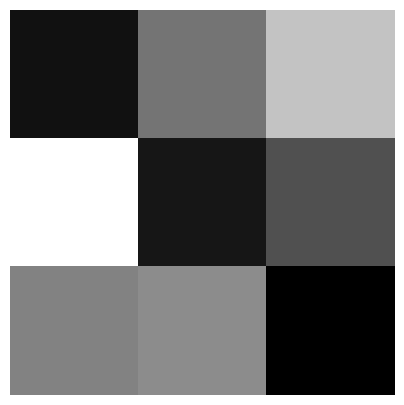

In [13]:
# Plotting the filter `a`.
plot(a)

In [14]:
# Applying the convolution of filter `a` over `image_gray`.
convolve(image_gray, a)

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 181.96362077, 173.52855186, ..., 305.15520451,
        312.66260824,   0.        ],
       [  0.        , 186.13376098, 176.51431922, ..., 301.90402331,
        308.26030622,   0.        ],
       ...,
       [  0.        , 709.484367  , 692.84302647, ..., 338.3307682 ,
        316.92704789,   0.        ],
       [  0.        , 711.23989394, 699.2509474 , ..., 380.29149597,
        364.7275047 ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

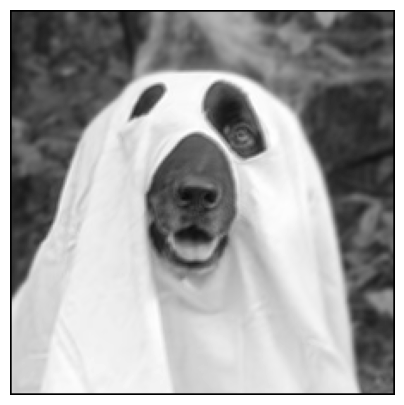

In [15]:
# Plotting the convolved image.
plot(convolve(image_gray, a))

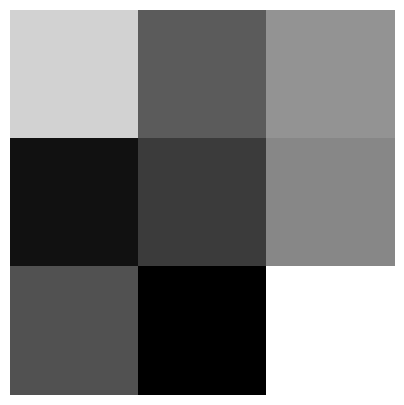

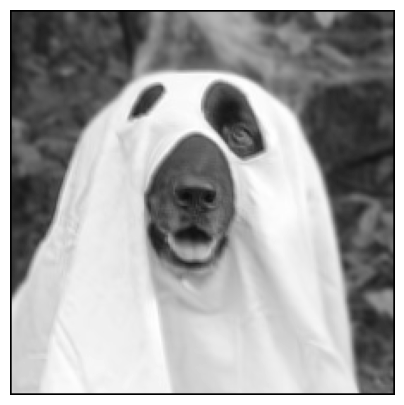

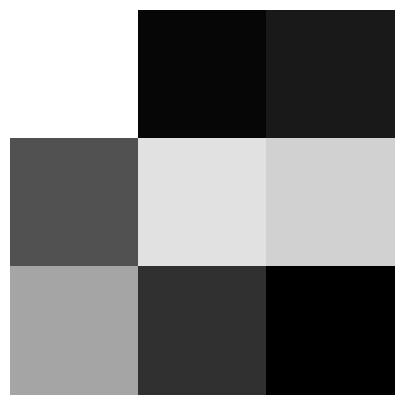

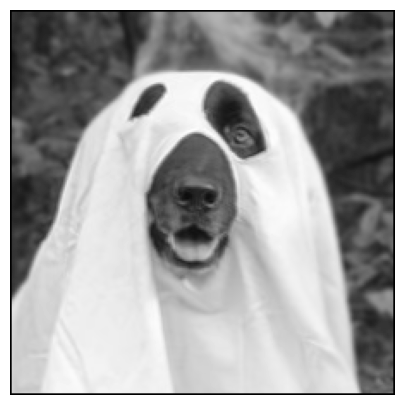

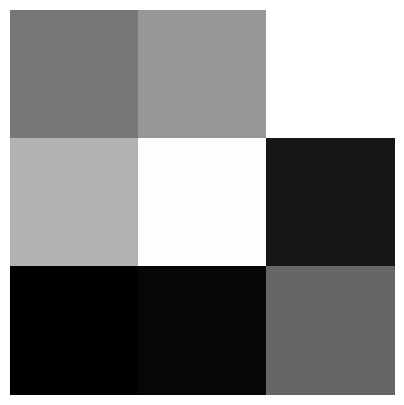

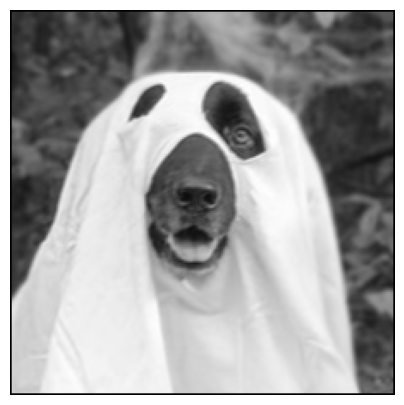

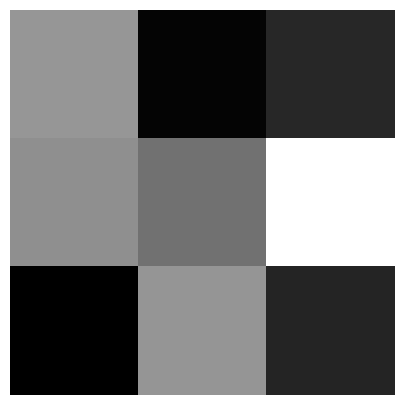

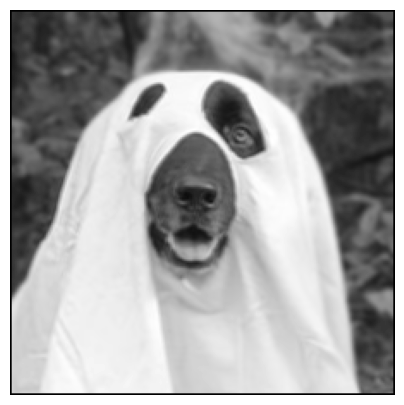

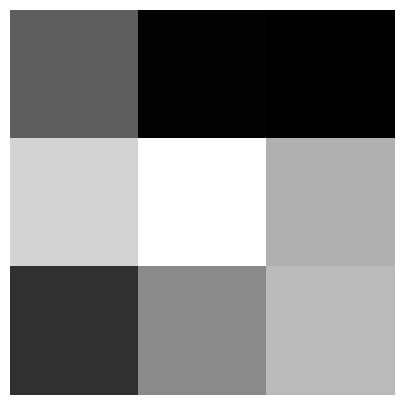

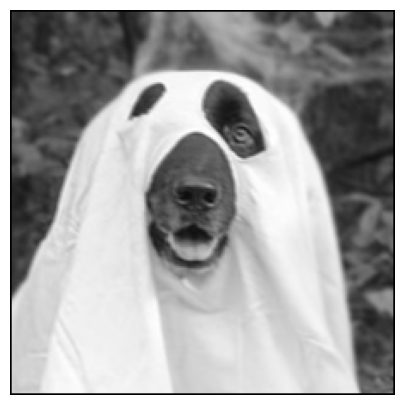

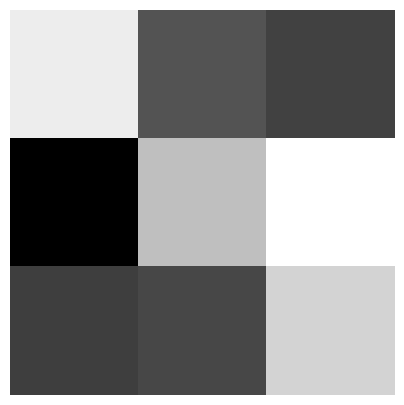

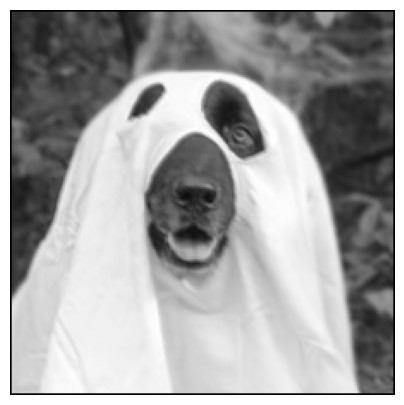

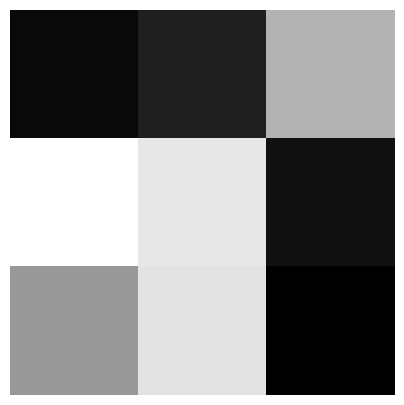

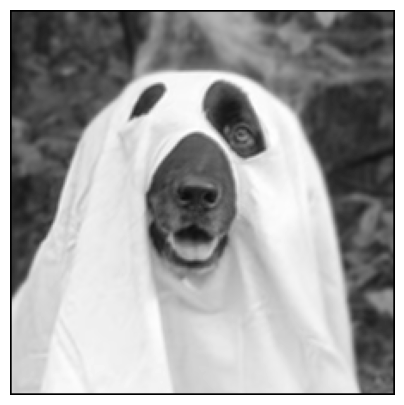

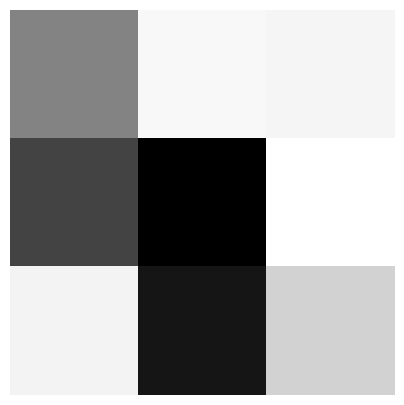

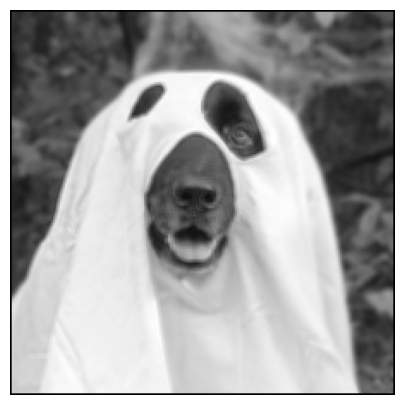

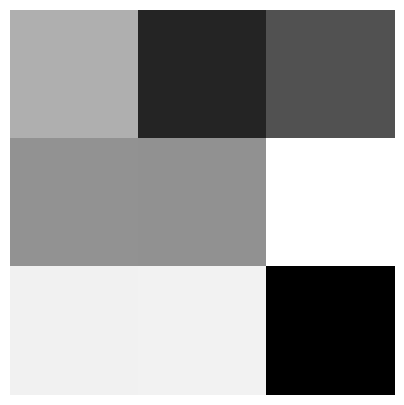

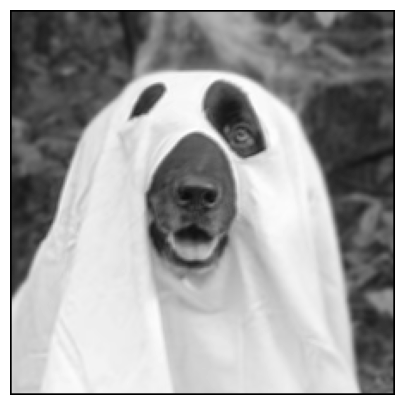

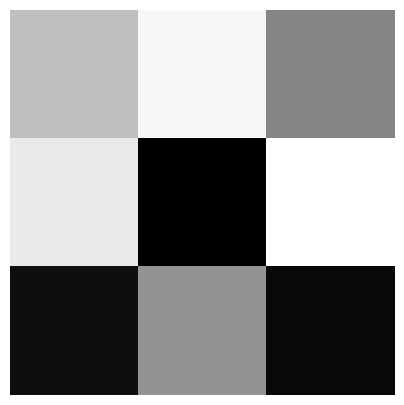

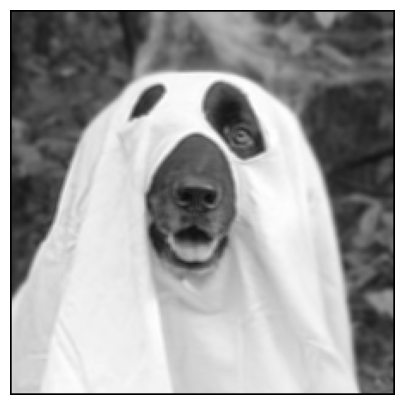

In [16]:
# Iterating 10 times to apply 10 different random filters to `image_gray` and plot the filters and convolved images.
for i in range(10):
# Generating a random 3x3 filter `a`.
  a = np.random.rand(3,3)
# Plotting the filter `a`.
  plot(a)
# Applying the convolution of filter `a` over `image_gray` and plotting the resulting convolved image.
  plot(convolve(image_gray, a))

